In [1]:
import torch
import torchvision
import torchvision.transforms.functional as F
import torchvision.utils as utils
import torchvision.io as io
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
def show(images):
    '''Displays an image or list of images in their order.'''
    if not isinstance(images, (list, tuple)):
        images = [images]
    
    fig, axs = plt.subplots(ncols=len(images), squeeze=False)
    
    for i, image in enumerate(images):
        image = image.detach()
        image = F.to_pil_image(image)
        axs[0, i].imshow(np.asarray(image))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

def show_grid(images, imgs_per_row=1):
    '''Displays a list of images in a specified grid. Expects images to be a one dimensional list or tuple.'''
    if not isinstance(images, list):
        images = [images]
        imgs_per_row= 1
    
    images = torchvision.utils.make_grid(images, nrow=imgs_per_row)
    show(images)

def mask_images(images, masks, alpha=0.65, colors=['red']):
    '''Creates a list of masked images.'''
    masks_over_images = [
        utils.draw_segmentation_masks(image, mask, alpha, colors)
        for image, mask in zip(images, masks)
    ]
    return masks_over_images

In [ ]:
voc_dir = '/path/to/voc/base/dir'

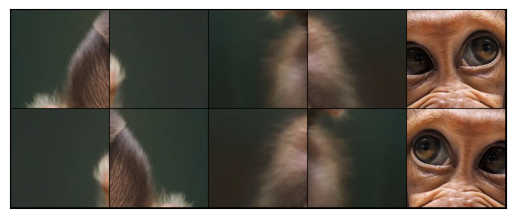

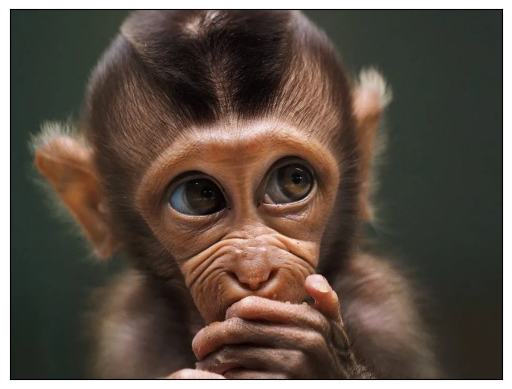

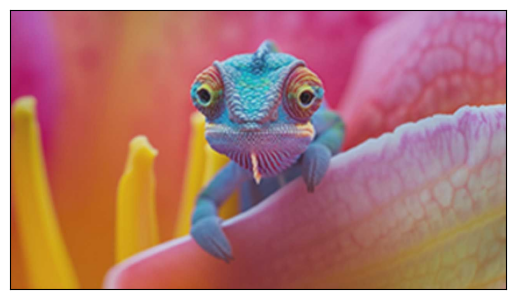

In [4]:
monkey = '960x0.jpg'
chameleon = 'chameleon.jpg'

monkey = io.read_image(os.path.join(voc_dir, monkey))
chameleon = io.read_image(os.path.join(voc_dir, chameleon))
monkey_transform = torchvision.transforms.Compose([
    torchvision.transforms.TenCrop((256, 256))
])
images = [monkey, chameleon]
images = monkey_transform(monkey)
# images = [transform(image1) for i in range(10)]
# images = [transform(image) for image in images]
images = list(images)
grid = utils.make_grid(images, 5)
show(grid)

show([monkey])
show([chameleon])

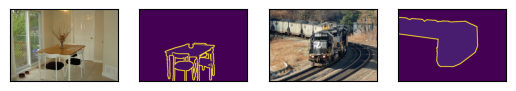

In [5]:
transform = torchvision.transforms.CenterCrop((333, 500))


image1 = transform(io.read_image(os.path.join(voc_dir, 'VOCdevkit/VOC2012/JPEGImages', '2007_000830.jpg')))
mask1 = transform(io.read_image(os.path.join(voc_dir, 'VOCdevkit/VOC2012/SegmentationClass','2007_000830.png')))
image2 = transform(io.read_image(os.path.join(voc_dir, 'VOCdevkit/VOC2012/JPEGImages', '2007_000333.jpg')))
mask2 = transform(io.read_image(os.path.join(voc_dir, 'VOCdevkit/VOC2012/SegmentationClass', '2007_000333.png')))

show([image1, mask1, image2, mask2])

shape = torch.Size([2, 1, 333, 500]), dtype = torch.bool


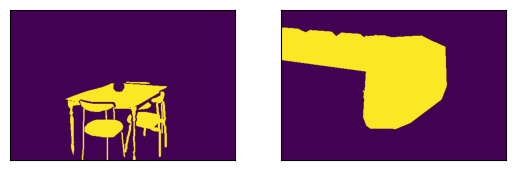

In [6]:
mask1 = mask1
mask1 = ((mask1 == 11) | (mask1 == 9))
mask2 = (mask2 == 19)
boolean_mask = torch.stack((mask1, mask2))
print(f'shape = {boolean_mask.shape}, dtype = {boolean_mask.dtype}')
show([m.float() for m in boolean_mask])

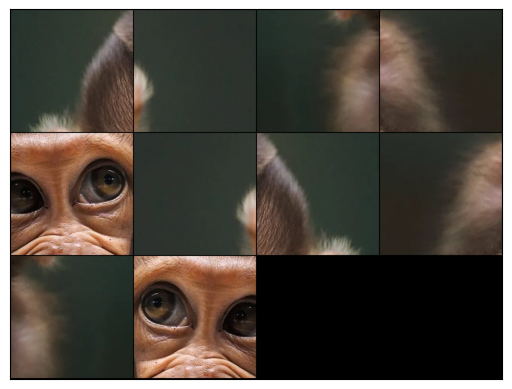

In [7]:
monkeys = list(monkey_transform(monkey))
show_grid(monkeys, 4)

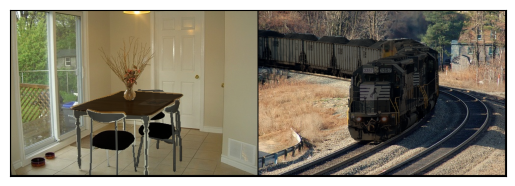

In [8]:
segments = mask_images([image1, image2], [mask1, mask2])
show_grid(segments, 12)